Project Title - Improving passenger survival: Lessons from the titanic

Business Problem:
"How can we help more passengers survive ship disasters by learning from what happened on the Titanic?"

In [1]:
#Step 1: Data loading

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Data Cleaning

In [7]:
# Show total and % of missing values
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display in a nice table
missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    '% of Total Values': missing_percent
})

print(missing_df)


             Missing Values  % of Total Values
PassengerId               0           0.000000
Survived                  0           0.000000
Pclass                    0           0.000000
Name                      0           0.000000
Sex                       0           0.000000
Age                     177          19.865320
SibSp                     0           0.000000
Parch                     0           0.000000
Ticket                    0           0.000000
Fare                      0           0.000000
Cabin                   687          77.104377
Embarked                  2           0.224467


In [8]:
#Handling missing values

In [9]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [10]:
# Drop Cabin column (too much missing data)
df.drop('Cabin', axis=1, inplace=True)

In [11]:
# Fill missing Embarked with mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
# Double-check missing values are handled
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
#Exploratory Data Analysis(EDA)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [15]:
#1. Survival Count

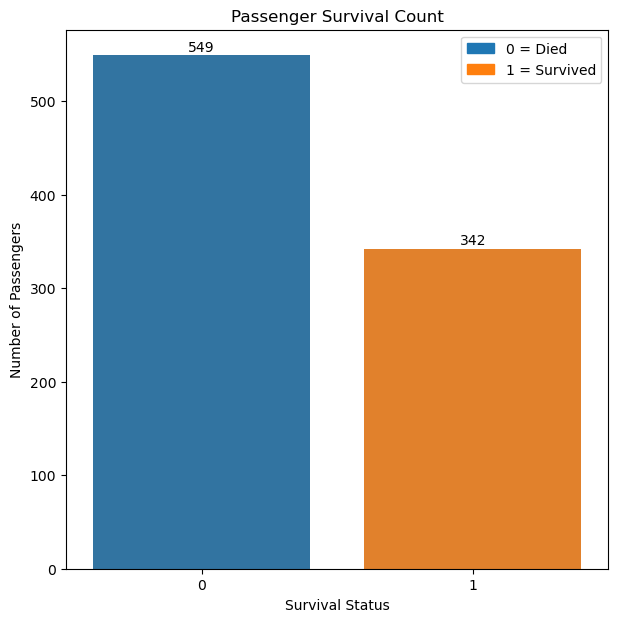

In [16]:
plt.figure(figsize=(7, 7))  # Width x Height in inches

# Add hue to differentiate between Died (0) and Survived (1)
sns.countplot(
    x='Survived',
    hue='Survived',
    data=df,
    dodge=False,  # Keeps bars stacked (although for 1 category each it's fine)
    palette={0: sns.color_palette()[0], 1: sns.color_palette()[1]}
)

plt.title('Passenger Survival Count')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')

# Add numbers on top of bars, skip bars with zero height
for p in plt.gca().patches:
    height = int(p.get_height())
    if height > 0:
        plt.gca().annotate(
            f'{height}', 
            (p.get_x() + p.get_width() / 2., height), 
            ha='center', va='center', fontsize=10, color='black', 
            xytext=(0, 6), textcoords='offset points'
        )

# Create custom legend with matching colors
died_patch = mpatches.Patch(color=sns.color_palette()[0], label='0 = Died')
survived_patch = mpatches.Patch(color=sns.color_palette()[1], label='1 = Survived')

plt.legend(handles=[died_patch, survived_patch])

plt.show()

In [17]:
#2. Survival by gender

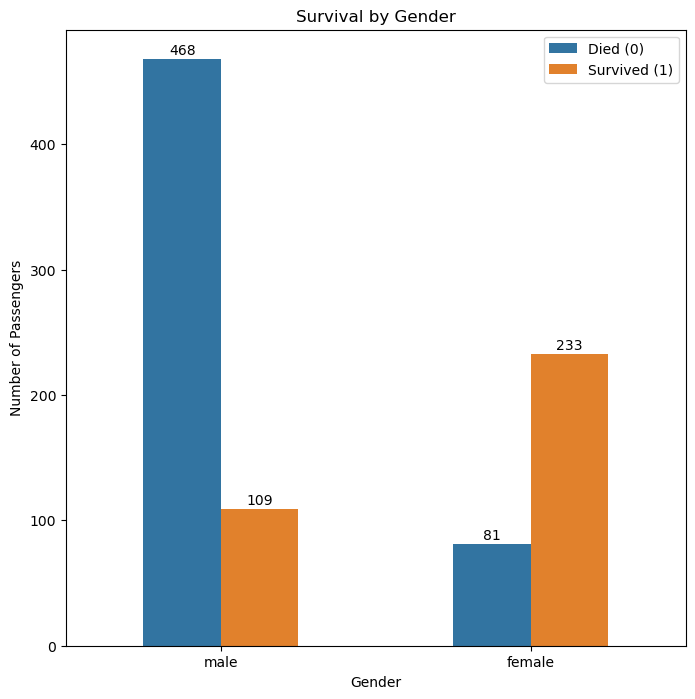

In [18]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Sex', hue='Survived', data=df, width=0.5)

plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(labels=['Died (0)', 'Survived (1)'])

# Add numbers on top of bars, skip if height == 0
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 6), textcoords='offset points')

plt.show()

In [19]:
#3. Survival by passenger class

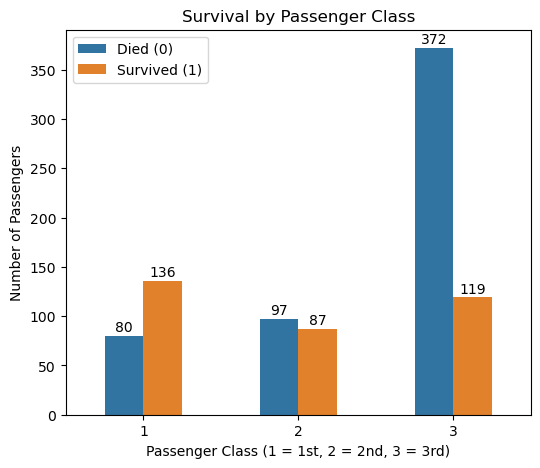

In [20]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Pclass', hue='Survived', data=df, width=0.5)

plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Number of Passengers')
plt.legend(labels=['Died (0)', 'Survived (1)'])

# Add numbers on top of bars, skip if height == 0
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 6), textcoords='offset points')

plt.show()

In [21]:
#4.Survival by Embarked Port
#checking if boarding port impacted survival.

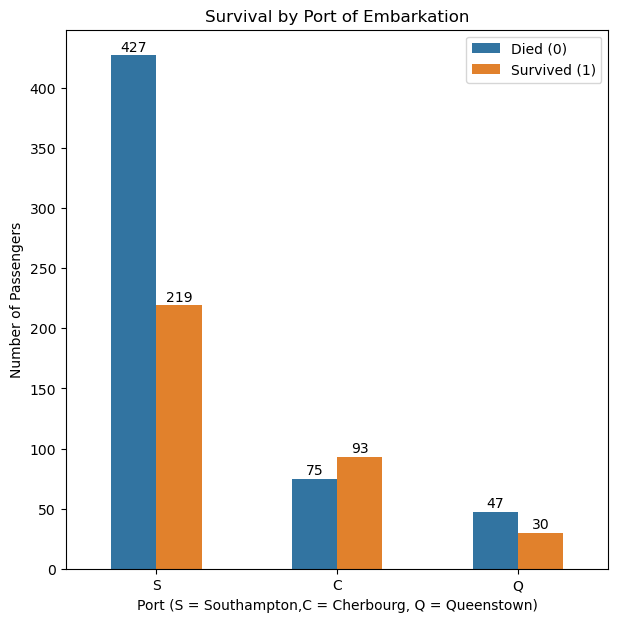

In [22]:
plt.figure(figsize=(7, 7))

# Create the countplot
ax = sns.countplot(x='Embarked', hue='Survived', data=df, width=0.5)

# Title and labels
plt.title('Survival by Port of Embarkation')
plt.xlabel('Port (S = Southampton,C = Cherbourg, Q = Queenstown)')
plt.ylabel('Number of Passengers')
plt.legend(labels=['Died (0)', 'Survived (1)'])

# Add numbers on top of bars, skip if height == 0
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 6), textcoords='offset points')

plt.show()

In [23]:
#5.Survival by age

In [24]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')

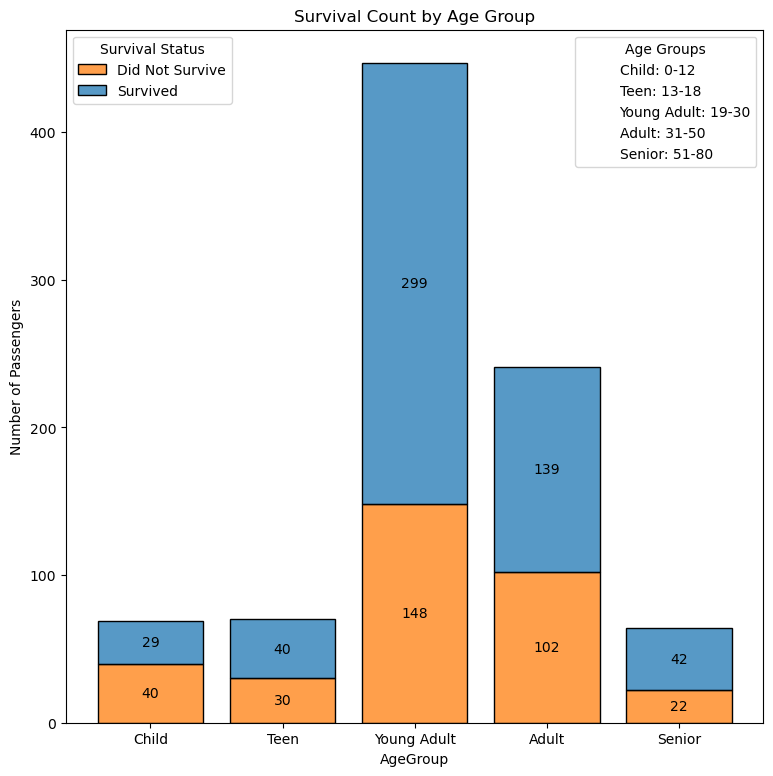

In [26]:
plt.figure(figsize=(9, 9))

# Plot the histogram (no palette used = defaults to blue and orange)
ax = sns.histplot(
    data=df,
    x='AgeGroup',
    hue='Survived',
    multiple='stack',
    shrink=0.8
)

# Title and labels
plt.title('Survival Count by Age Group')
plt.ylabel('Number of Passengers')

# Create the second legend (Age Ranges) with white patches
child = mpatches.Patch(color='white', label='Child: 0-12')
teen = mpatches.Patch(color='white', label='Teen: 13-18')
young_adult = mpatches.Patch(color='white', label='Young Adult: 19-30')
adult = mpatches.Patch(color='white', label='Adult: 31-50')
senior = mpatches.Patch(color='white', label='Senior: 51-80')

# Add Age Ranges legend in upper right
age_legend = plt.legend(
    handles=[child, teen, young_adult, adult, senior],
    title='Age Groups',
    loc='upper right'
)

# Add Survival Status legend in upper left (auto colors: blue for 0, orange for 1)
survival_legend = ax.legend(
    labels=['Did Not Survive', 'Survived'],
    title='Survival Status',
    loc='upper left'
)

# Re-add Age Ranges legend to the plot
ax.add_artist(age_legend)

# Add numbers on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10)

plt.show()

In [27]:
#Model Selection and Implementation

In [28]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')

In [30]:
#Preparing the data for modeling

# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns
df_model = df.drop(['Name', 'Ticket', 'PassengerId', 'AgeGroup'], axis=1, errors='ignore')

In [31]:
# Define features and target
X = df_model.drop('Survived', axis=1)
y = df_model['Survived']

In [32]:
#Split the Data into Train and Validation Sets

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Convert boolean columns to integers
X['Embarked_Q'] = X['Embarked_Q'].astype(int)
X['Embarked_S'] = X['Embarked_S'].astype(int)

In [35]:
#Train the Logistic Regression Model

In [36]:
print(X.isnull().sum())

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [37]:
# Create and train the model
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Validation Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



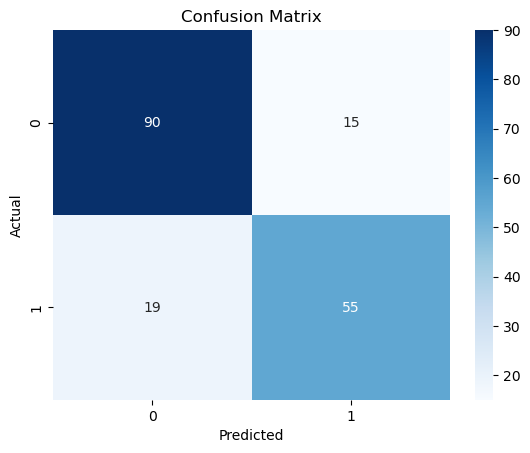

In [38]:
# Predict on validation data
y_pred = log_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
#Feature Importance

In [40]:
# Assuming 'log_model' is your trained logistic regression model
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
})

# Sort by absolute value of coefficients (most impactful)
importance['Abs_Coefficient'] = importance['Coefficient'].abs()
importance = importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the sorted feature importance
importance[['Feature', 'Coefficient']]

,Feature,Coefficient
1,Sex,2.589794
0,Pclass,-0.938140
7,Embarked_S,-0.399080
3,SibSp,-0.295342
6,Embarked_Q,-0.112368
4,Parch,-0.107644
2,Age,-0.030564
5,Fare,0.002577
